# Linear Regression and Learning Curve challenges
Name: Robert Fang
Date: April 21, 2019

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [4]:
#Generate some fake data 
s = 500
x = np.linspace(10,1000,s)
epsilon = .25 * np.random.randn(s)
beta0 = 5
beta1 = .8
y = beta0 + beta1*np.log(x) + epsilon

In [4]:
data = pd.DataFrame({'x':x,'y':y})

In [5]:
data.head()

,x,y
0,10.000000,6.713018
1,11.983968,6.968223
2,13.967936,6.811120
3,15.951904,7.021599
4,17.935872,7.349649


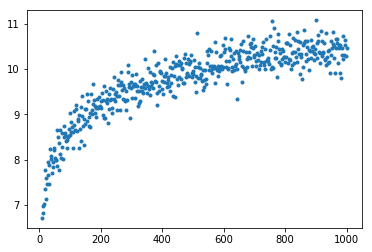

In [6]:
plt.plot(x, y, '.')

In [7]:
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
data['X_poly'] = data['x'] ** 2
#X_poly = X_poly.values.reshape(-1,1)

In [9]:
data['X_log']= np.log(data['x'])
#_log = X_log.values.reshape(-1,1)

In [10]:
data.head()

,x,y,X_poly,X_log
0,10.000000,6.713018,100.000000,2.302585
1,11.983968,6.968223,143.615487,2.483570
2,13.967936,6.811120,195.103233,2.636764
3,15.951904,7.021599,254.463235,2.769578
4,17.935872,7.349649,321.695495,2.886803


In [11]:
lr_model = LinearRegression()
X_p = data['X_poly'].values.reshape(-1,1)
lr_model.fit(X_p, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
lr_model.score(X_p,y)

0.529971403068928

In [13]:
lr_log = LinearRegression()
X_log = data['X_log'].values.reshape(-1,1)
lr_log.fit(X_log, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lr_log.score(X_log,y)

0.8931344262169141

##### Challenge 2
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [10]:
#Generate some fake data 
s = 500
x2 = np.linspace(10,1000,s)/10
epsilon2 = .25 * np.random.randn(s)
beta_0 = 5
beta_1 = .8
beta_2 = .01
y2 = beta_0 + beta_1*x2 + beta_2*(x2**2) + epsilon2

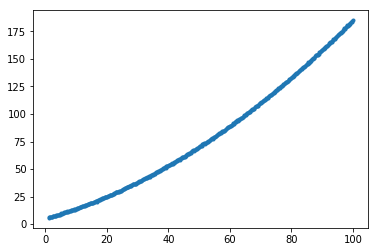

In [11]:
plt.plot(x2, y2, '.')

In [12]:
X_train, X_val, y_train, y_val = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [13]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
pred_y = lr_model2.predict(X_val.reshape(-1,1))

In [16]:
mean_squared_error(y_val, pred_y)

61.26625018127983

##### Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). 

Over the x axis of model degree (8 points), plot:
training error
test error
R squared
AIC

In [17]:
from sklearn.linear_model import LassoLarsIC

In [32]:
data = pd.DataFrame({'y':y2, 'x':x2})

In [73]:
def polynomial_model(data, order):
    columns = []
    
    for i in range(order+1):
        col = 'x'+str(i)
        columns.append(col)
        data[col] = data['x']**i
    
    x = data[columns]
    y = data['y']
    
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
    stats_model = sm.OLS(y_train, X_train).fit()
    y_train_pred = stats_model.predict(X_train)
    training_error =  mean_squared_error(y_train, y_train_pred)
    y_test_pred = stats_model.predict(X_val)
    testing_error =  mean_squared_error(y_val, y_test_pred)
    r_squared = stats_model.rsquared
    AIC = stats_model.aic
    
    return training_error, testing_error, r_squared, AIC

In [74]:
polynomial_model(data,7)

(0.057921357837119415,
 0.07590073434575972,
 0.9999776633159893,
 11.683191420124444)

In [75]:
tr_error = []
test_error = []
r_sqr = []
AIC_list = []
poly = []

for n in range(7):
    poly.append(n+1)
    training_error, testing_error, r_squared, AIC = polynomial_model(data, n)
    tr_error.append(training_error)
    test_error.append(testing_error)
    r_sqr.append(r_squared)
    AIC_list.append(AIC)

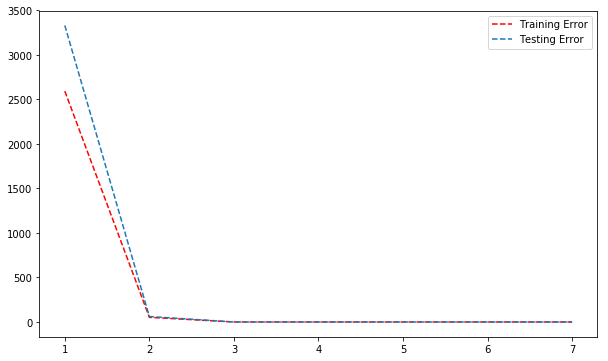

In [76]:
plt.figure(figsize=(10,6))
plt.plot(poly, tr_error, 'r--', label = 'Training Error', )
plt.plot(poly, test_error, '--', label = 'Testing Error')
plt.legend()

Text(0, 0.5, 'R-Squared value')

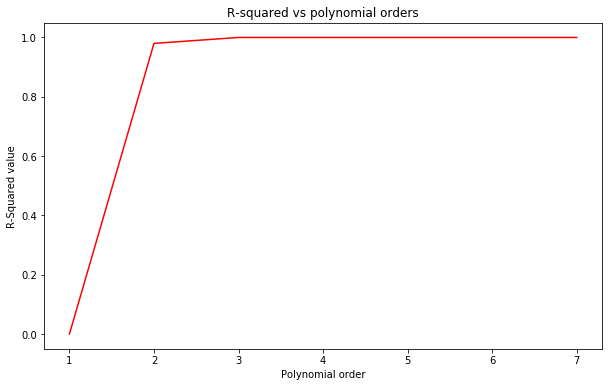

In [77]:
plt.figure(figsize=(10,6))
plt.plot(poly, r_sqr, 'r-' )
plt.title('R-squared vs polynomial orders')
plt.xlabel('Polynomial order')
plt.ylabel('R-Squared value')

Text(0, 0.5, 'AIC value')

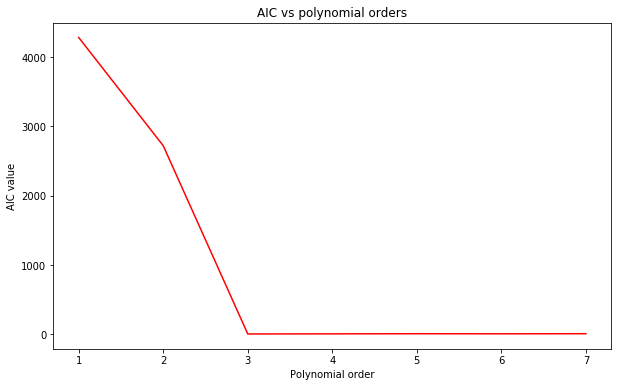

In [78]:
plt.figure(figsize=(10,6))
plt.plot(poly, AIC_list, 'r-' )
plt.title('AIC vs polynomial orders')
plt.xlabel('Polynomial order')
plt.ylabel('AIC value')

##### Challenge 4 
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [82]:
def regression_model(data, m):    
    df = data[:m]
    x = df.drop('y',axis=1)
    y = df['y']
    
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
    stats_model = sm.OLS(y_train, X_train).fit()
    y_train_pred = stats_model.predict(X_train)
    training_error =  mean_squared_error(y_train, y_train_pred)
    y_test_pred = stats_model.predict(X_val)
    testing_error =  mean_squared_error(y_val, y_test_pred)
    
    return training_error, testing_error

In [85]:
tr_error_2 = []
test_error_2 = []
samples = []
for m in range(10,101, 5):
    samples.append(m)   
    training_error, testing_error = regression_model(data,m)
    tr_error_2.append(training_error)
    test_error_2.append(testing_error)

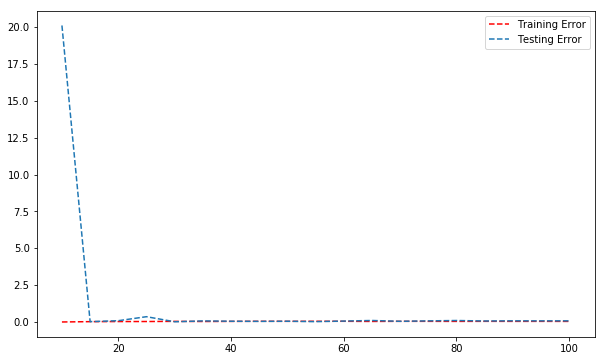

In [86]:
plt.figure(figsize=(10,6))
plt.plot(samples, tr_error_2, 'r--', label = 'Training Error', )
plt.plot(samples, test_error_2, '--', label = 'Testing Error')
plt.legend()